<a href="https://colab.research.google.com/github/illiyas-sha/Colab-Notebook/blob/main/EDA_Flight_delay_and_causes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flight Delay and Causes**

This Dataset contains Flights trip and multiple cause of delay.
Using this data you can find what caused the delay for flight whether it's Security delay, NAS delay or Carrier delay, etc.

Dataset:
https://www.kaggle.com/undersc0re/flight-delay-and-causes


## **1. Importing Dataset from Kaggle using API**

In [ ]:
 ! pip install -q kaggle
 

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"illiyas","key":"61dbcecfb0278891c889a7147177854a"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 ! kaggle datasets list

In [ ]:
! kaggle datasets download -d undersc0re/flight-delay-and-causes

 45% 7.00M/15.6M [00:00<00:00, 72.4MB/s]
100% 15.6M/15.6M [00:00<00:00, 76.0MB/s]


In [ ]:
ls

flight-delay-and-causes.zip  kaggle.json  sample_data/


In [ ]:
!unzip flight-delay-and-causes.zip  && rm flight-delay-and-causes.zip

Archive:  flight-delay-and-causes.zip
  inflating: Flight_delay.csv        


##**2. Reading Dataset**

### 2.1 Importing Packages

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 2.2 Reading data set



1.   Loading dataset using pandas
2.   View them




In [110]:
#import
import pandas as pd
df = pd.read_csv("/content/Flight_delay.csv") 
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Org_Airport,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,Indianapolis International Airport,LAS,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,135,107,80,94,IND,Indianapolis International Airport,MCO,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,240,213,15,27,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,135,110,16,28,IND,Indianapolis International Airport,TPA,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16


## **3. Data Preprocessing and cleaning**

### Finding columns having NaN values to handle missing values

In [111]:
#finding shape of the column
df.shape

(484551, 29)


> *we have 29 columns and 484551 rows*




In [112]:
# Finding Missing Values by matrix view
# %matplotlib inline
# import missingno as msno
# msno.matrix(df)

In [113]:
df.isnull().sum()

DayOfWeek               0
Date                    0
DepTime                 0
ArrTime                 0
CRSArrTime              0
UniqueCarrier           0
Airline                 0
FlightNum               0
TailNum                 0
ActualElapsedTime       0
CRSElapsedTime          0
AirTime                 0
ArrDelay                0
DepDelay                0
Origin                  0
Org_Airport          1177
Dest                    0
Dest_Airport         1479
Distance                0
TaxiIn                  0
TaxiOut                 0
Cancelled               0
CancellationCode        0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
dtype: int64

Out of 29 columns, 2 columns have Nan values



let us see the percentage of the missing values per column






In [114]:
missing_percentage= df.isnull().sum().sort_values(ascending=False)/ len(df)
missing_percentage


Dest_Airport         0.003052
Org_Airport          0.002429
LateAircraftDelay    0.000000
ArrDelay             0.000000
Date                 0.000000
DepTime              0.000000
ArrTime              0.000000
CRSArrTime           0.000000
UniqueCarrier        0.000000
Airline              0.000000
FlightNum            0.000000
TailNum              0.000000
ActualElapsedTime    0.000000
CRSElapsedTime       0.000000
AirTime              0.000000
Origin               0.000000
DepDelay             0.000000
SecurityDelay        0.000000
Dest                 0.000000
Distance             0.000000
TaxiIn               0.000000
TaxiOut              0.000000
Cancelled            0.000000
CancellationCode     0.000000
Diverted             0.000000
CarrierDelay         0.000000
WeatherDelay         0.000000
NASDelay             0.000000
DayOfWeek            0.000000
dtype: float64

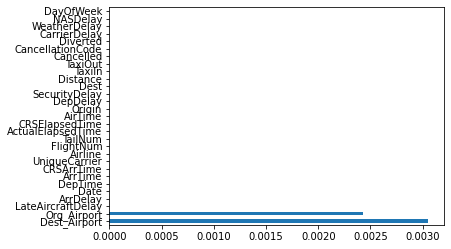

In [115]:
missing_percentage.plot(kind='barh')

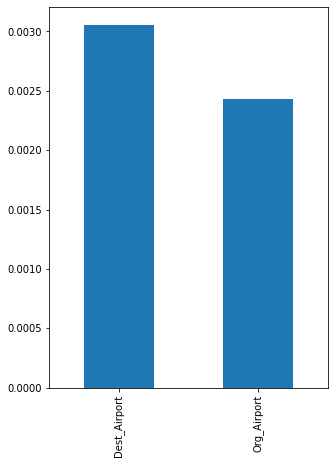

In [116]:
missing_percentage[missing_percentage != 0].plot(kind='bar',figsize=(5,7))

Here, the missing values are very very low (i.e) 0.24% and 0.30%. 

If we have more missing values, we can drop those columns. But here, we have less number of missing values. So the best method is to handle those NAN values.

Now, we have to handle this value. only few values are missing. So we are filling those values with most frequent values

In [117]:
df.Org_Airport.mode()

0    Chicago O'Hare International Airport
dtype: object

In [118]:
df.Dest_Airport.mode()

0    Chicago O'Hare International Airport
dtype: object

Here **Chicago O'Hare International Airport** is the most frequent value. Replacing Nan with this value

In [119]:
#Replacing Missing values of Org_Airport and Dest_Airport with most frequent values
df['Org_Airport'] = df['Org_Airport'].fillna(df['Org_Airport'].mode()[0])
df['Dest_Airport'] = df['Dest_Airport'].fillna(df['Dest_Airport'].mode()[0])




> Now all Missing values are handled



Finding columns having numerical data and categorical data

In [120]:
#Name of the columns having numeric values
numeric=df.select_dtypes(include=np.number).columns.tolist()
#Number of columns having numeric values 
len(numeric)

20




> Out of 29 columns, 20 columns have numerical data. And the remaining 9 columns have categorical data.




## **4. Exploratory Data Analysis and Visualization**

### 4.1 Delay categories

Separating Delay into another dataframe

In [121]:
#creating new dataframe by combining 5 types of delays
data=[df['CarrierDelay'],df['WeatherDelay'],df['NASDelay'],df['SecurityDelay'],df['LateAircraftDelay']]
headers = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
df1 = pd.concat(data, axis=1, keys=headers)
df1.head()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2,0,0,0,32
1,10,0,0,0,47
2,8,0,0,0,72
3,3,0,0,0,12
4,0,0,0,0,16


In [122]:
df1.isin([0]).sum()

CarrierDelay         226046
WeatherDelay         450243
NASDelay             234084
SecurityDelay        482359
LateAircraftDelay    181451
dtype: int64

In [123]:
#check whether the data have atleast any one of the  delay
df1['outcome'] = 0
df1.loc[df1.loc[(df1.iloc[:,:-1].nunique(axis=1) == 1) \
    & (df1.iloc[:,:-1] == 0).all(axis=1)].index, 'outcome'] = 1
#stores '0' or '1' in 'outcome' ----- '0' - if the row contains any one of the delay.
#                                     '1' - if the row contains no delay

In [124]:
#filtering rows which have 1 in 'outcome' column
df1[df1['outcome']==1]
#  if all rows of 'outcome' column is 0, then it has any one of the 5 types of delay

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,outcome


All rows have '0' as outcome

So all the flights in the data of this dataset, have atleast any one of the delay.

### 4.2 Airlines which have more travel records

In [125]:
#Finding unique airlines in 'Airline' column
Airlines=df.Airline.unique()
len(Airlines)

12

The data contains 12 unique Airlines

In [126]:
#returns counts of each unique values
value=df.Airline.value_counts()
value

Southwest Airlines Co.          119048
American Airlines Inc.           73053
American Eagle Airlines Inc.     58698
United Air Lines Inc.            56896
Skywest Airlines Inc.            50384
US Airways Inc.                  31755
Delta Air Lines Inc.             30220
Atlantic Southeast Airlines      28678
JetBlue Airways                  15364
Alaska Airlines Inc.             10000
Frontier Airlines Inc.            9015
Hawaiian Airlines Inc.            1440
Name: Airline, dtype: int64

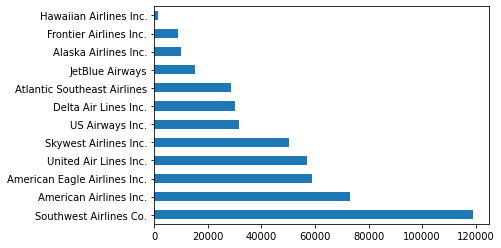

In [127]:
#Horizontal bar plot of this value counts
value.plot(kind='barh')

Southwest Airline company has the largest number of travel delay records

### 4.3 Day of week ( In which day of the week, the delay happens the most ?  ) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


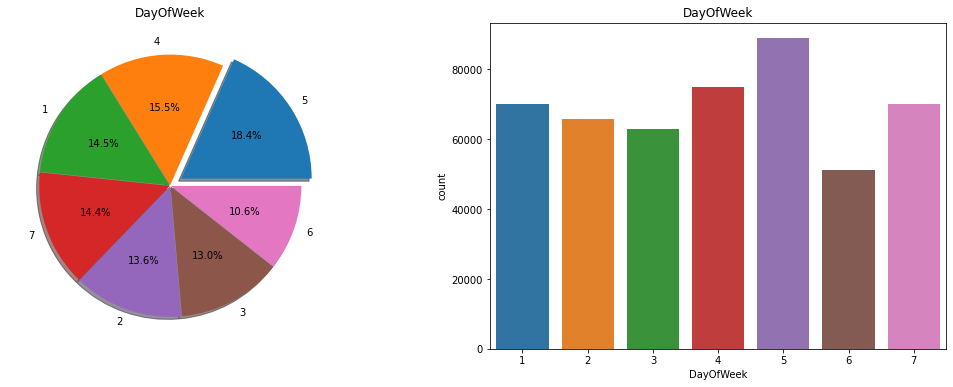

DayOfWeek represents whether the flight was on delayed on Monday-(1), Tuesday-(2),Wednesday - (3),Thursday- (4), Friday- (5), Saturday- (6), Sunday- (7)


In [128]:
# pie plot to show the days of week 
f,ax=plt.subplots(1,2,figsize=(18,6))
df['DayOfWeek'].value_counts().plot.pie(explode=[0.1,0.005,0.005,0.005,0.005,0.005,0.005],autopct='%1.1f%%',ax=ax[0],shadow=True) 
ax[0].set_title('DayOfWeek')
ax[0].set_ylabel('')
sns.countplot('DayOfWeek', data=df,ax=ax[1])
ax[1].set_title('DayOfWeek')
plt.show()

print('DayOfWeek represents whether the flight was on delayed on Monday-(1), Tuesday-(2),Wednesday - (3),Thursday- (4), Friday- (5), Saturday- (6), Sunday- (7)')

The maximum number of delay happened on **FRIDAY**

### 4.4 Departure Time

In [ ]:
#TO CHANGE THE MISSING DIGIT ------ DepTime - 958 to 0958
df['DepTime'] = df.DepTime.map("{:04}".format)
df.head()

In [131]:
#ADDING COLON AFTER TWO CHARACHTER -----DepTime  - 09:58
df['DepTime'] =df['DepTime'].astype(str).replace(r"(\d{2})(\d+)", r"\1:\2", regex=True)
df.head(10)

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Org_Airport,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,18:29,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,19:37,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,Indianapolis International Airport,LAS,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,16:44,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,135,107,80,94,IND,Indianapolis International Airport,MCO,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,14:52,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,240,213,15,27,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12
4,4,03-01-2019,13:23,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,135,110,16,28,IND,Indianapolis International Airport,TPA,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16
5,4,03-01-2019,14:16,1512,1435,WN,Southwest Airlines Co.,54,N643SW,56,70,49,37,51,ISP,Long Island MacArthur Airport,BWI,Baltimore-Washington International Airport,220,2,5,0,N,0,12,0,0,0,25
6,4,03-01-2019,16:57,1754,1735,WN,Southwest Airlines Co.,623,N724SW,57,70,47,19,32,ISP,Long Island MacArthur Airport,BWI,Baltimore-Washington International Airport,220,5,5,0,N,0,7,0,0,0,12
7,4,03-01-2019,14:22,1657,1610,WN,Southwest Airlines Co.,188,N215WN,155,195,143,47,87,ISP,Long Island MacArthur Airport,FLL,Fort Lauderdale-Hollywood International Airport,1093,6,6,0,N,0,40,0,0,0,7
8,4,03-01-2019,21:07,2334,2230,WN,Southwest Airlines Co.,362,N798SW,147,165,134,64,82,ISP,Long Island MacArthur Airport,MCO,Orlando International Airport,972,6,7,0,N,0,5,0,0,0,59
9,4,03-01-2019,18:12,1927,1815,WN,Southwest Airlines Co.,422,N779SW,135,145,118,72,82,ISP,Long Island MacArthur Airport,MDW,Chicago Midway International Airport,765,6,11,0,N,0,3,0,0,0,69


In [132]:
#changing 24:00 to 00:00
#because while changing to Standard Timestamp, we will get error if the column have 24:00 value)
df['DepTime'] = df.DepTime.replace(to_replace ='24:', value = '00:', regex = True)
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Org_Airport,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,18:29,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,19:37,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,Indianapolis International Airport,LAS,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,16:44,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,135,107,80,94,IND,Indianapolis International Airport,MCO,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,14:52,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,240,213,15,27,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12
4,4,03-01-2019,13:23,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,135,110,16,28,IND,Indianapolis International Airport,TPA,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16


In [133]:
#checking the specific row that contains 24:00
df.DepTime[268503]

'00:00'

In [ ]:
#Time delta function
#df["DepTime"] = pd.to_datetime(df.DepTime).apply(lambda x: x.strftime(r'%H:%M:%S'))
#df['DepTime'] = pd.to_timedelta(np.where(df['DepTime'].str.count(':') == 1, df['DepTime'] + ':00', df['DepTime']))
#df.head()
# df['DepTimeStamp']=df.apply(lambda r : pd.datetime.combine(r['Date'],r['DepTime']),1)
# df.head()

In [134]:
#Creating a new column for Departure Time Stamp
df['DepTimeStamp']= np.nan

In [135]:
#Combining 'Date' column and 'DepTime' column
df['DepTimeStamp'] = df.Date.map(str) + " " + df.DepTime
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Org_Airport,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTimeStamp
0,4,03-01-2019,18:29,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32,03-01-2019 18:29
1,4,03-01-2019,19:37,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,Indianapolis International Airport,LAS,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47,03-01-2019 19:37
2,4,03-01-2019,16:44,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,135,107,80,94,IND,Indianapolis International Airport,MCO,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72,03-01-2019 16:44
3,4,03-01-2019,14:52,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,240,213,15,27,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12,03-01-2019 14:52
4,4,03-01-2019,13:23,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,135,110,16,28,IND,Indianapolis International Airport,TPA,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16,03-01-2019 13:23


In [136]:
#Applying time stamp to dataframe DepTimeStamp
df.DepTimeStamp = pd.to_datetime(df.DepTimeStamp)
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Org_Airport,Dest,Dest_Airport,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTimeStamp
0,4,03-01-2019,18:29,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,90,77,34,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,515,3,10,0,N,0,2,0,0,0,32,2019-03-01 18:29:00
1,4,03-01-2019,19:37,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,250,230,57,67,IND,Indianapolis International Airport,LAS,McCarran International Airport,1591,3,7,0,N,0,10,0,0,0,47,2019-03-01 19:37:00
2,4,03-01-2019,16:44,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,135,107,80,94,IND,Indianapolis International Airport,MCO,Orlando International Airport,828,6,8,0,N,0,8,0,0,0,72,2019-03-01 16:44:00
3,4,03-01-2019,14:52,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,240,213,15,27,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,1489,7,8,0,N,0,3,0,0,0,12,2019-03-01 14:52:00
4,4,03-01-2019,13:23,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,135,110,16,28,IND,Indianapolis International Airport,TPA,Tampa International Airport,838,4,9,0,N,0,0,0,0,0,16,2019-03-01 13:23:00


In [137]:
#checking the specific row that contained 24:00 time
df.DepTimeStamp[268503]

Timestamp('2019-03-15 00:00:00')

In [ ]:
df.head()

**On which time delay happens mostly?**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Percentage Of Delay Occurance')

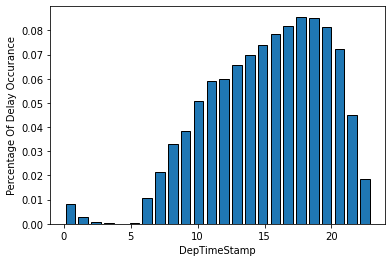

In [138]:
#distribution plot for the 24 hours for all the data
sns.distplot(df.DepTimeStamp.dt.hour, bins=24 , kde=False, hist_kws={"rwidth":0.75,'edgecolor':'black', 'alpha':1.0},norm_hist=True, )
plt.ylabel("Percentage Of Delay Occurance")

-- A High Percentage of Delay occurs between 15:00:00 to 20:00:00 (i.e) 3 PM to 8 PM 

--The flights scheduled to depart at 3 PM to 8 PM delays mostly

-- The flights scheduled to depart at 12 AM to 5 AM -less delay


### 4.5 Month

Text(0.5, 1.0, 'Month vs Delay Occurance')

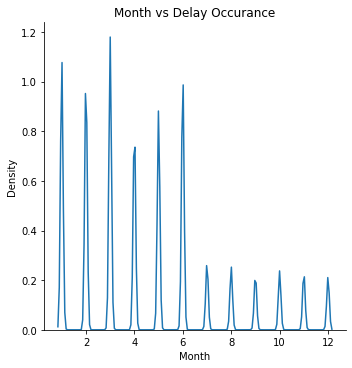

In [139]:
#distribution plot for all the months in the year
sns.displot(df.DepTimeStamp.dt.month,kind="kde", bw_adjust=0.25 )
plt.xlabel("Month")
plt.title("Month vs Delay Occurance")

After this sudden decrease in the graph(7th month to 12th month), I was a little surprised at the result, & I rechecked my data.

And found that, **the data is available only for First 6 months of the 2019**. So we don't have another 6 months data. That is the reason for this sudden change.

### 4.6 Feature selection by **Pearson Correlation**

In [108]:
df.corr()

,DayOfWeek,DepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
DayOfWeek,1.000000,0.018649,0.008181,0.013005,-0.012214,0.004801,0.009373,0.007838,-0.002553,0.003026,0.011913,0.011218,-0.016737,NaN,NaN,0.016825,0.001648,-0.026705,0.005742,-0.000288
DepTime,0.018649,1.000000,0.363243,0.702809,-0.029193,-0.072032,-0.055900,-0.066996,0.106640,0.132379,-0.064510,-0.042002,-0.026436,NaN,NaN,-0.042486,0.000472,0.004867,-0.018189,0.188044
ArrTime,0.008181,0.363243,1.000000,0.500790,0.006500,-0.039458,-0.041244,-0.041938,-0.071198,-0.072950,-0.055781,0.030344,-0.009851,NaN,NaN,-0.075551,-0.025724,0.030976,-0.010336,-0.037784
CRSArrTime,0.013005,0.702809,0.500790,1.000000,-0.061340,0.010090,0.022881,0.011534,0.028811,0.045205,0.012401,-0.009451,-0.000575,NaN,NaN,-0.089387,-0.019193,-0.007638,-0.016704,0.143355
FlightNum,-0.012214,-0.029193,0.006500,-0.061340,1.000000,-0.334002,-0.353528,-0.354269,0.025789,0.016372,-0.369566,0.006770,0.004033,NaN,NaN,0.036285,0.062789,0.038481,-0.000900,-0.059066
ActualElapsedTime,0.004801,-0.072032,-0.039458,0.010090,-0.334002,1.000000,0.969723,0.975322,0.091506,0.009281,0.950683,0.175882,0.307644,NaN,NaN,0.029732,-0.004328,0.171725,0.000934,-0.031510
CRSElapsedTime,0.009373,-0.055900,-0.041244,0.022881,-0.353528,0.969723,1.000000,0.986646,0.040953,0.036579,0.983551,0.110104,0.133170,NaN,NaN,0.045671,-0.025444,0.047489,0.001622,-0.011532
AirTime,0.007838,-0.066996,-0.041938,0.011534,-0.354269,0.975322,0.986646,1.000000,0.039962,0.011101,0.977436,0.097937,0.103518,NaN,NaN,0.037612,-0.024446,0.069138,0.002494,-0.022408
ArrDelay,-0.002553,0.106640,-0.071198,0.028811,0.025789,0.091506,0.040953,0.039962,1.000000,0.948856,0.027744,0.106703,0.220981,NaN,NaN,0.478470,0.266126,0.395434,-0.002701,0.505515
DepDelay,0.003026,0.132379,-0.072950,0.045205,0.016372,0.009281,0.036579,0.011101,0.948856,1.000000,0.027307,0.016591,-0.011958,NaN,NaN,0.505906,0.244019,0.235891,-0.001912,0.541351


This contains raw correlated values. To visualize this let as plot heatmap

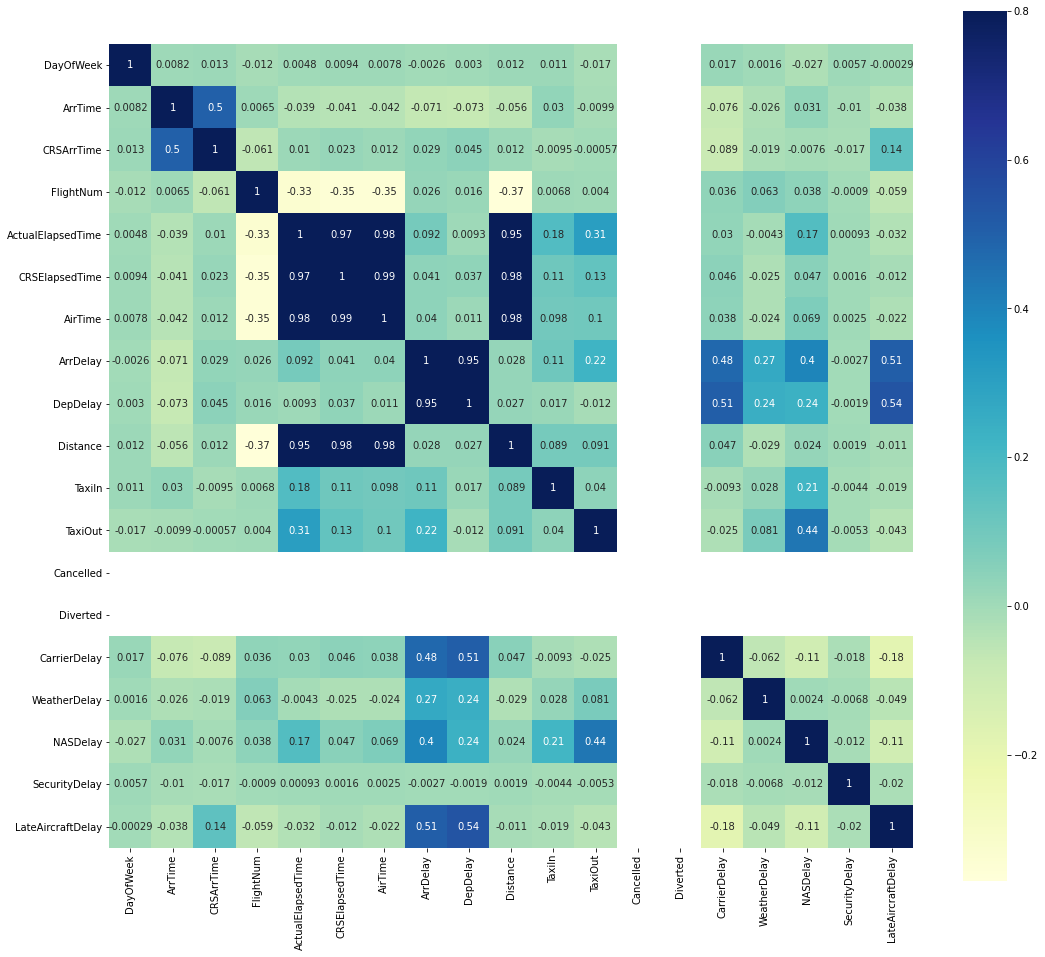

In [140]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(18, 16))
sns.heatmap(corrmat, vmax=.8, square=True,  cmap="YlGnBu",annot=True);
plt.show()

In [141]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [142]:
#Length of correlated columns
corr_features = correlation(df, 0.9)
len(set(corr_features))

4

In [143]:
#column names of correlated features
corr_features

{'AirTime', 'CRSElapsedTime', 'DepDelay', 'Distance'}

These columns can be droped as these columns are highley correlated.

In [144]:
df.drop(corr_features,inplace=True,axis=1)
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,ArrDelay,Origin,Org_Airport,Dest,Dest_Airport,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTimeStamp
0,4,03-01-2019,18:29,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,3,10,0,N,0,2,0,0,0,32,2019-03-01 18:29:00
1,4,03-01-2019,19:37,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,57,IND,Indianapolis International Airport,LAS,McCarran International Airport,3,7,0,N,0,10,0,0,0,47,2019-03-01 19:37:00
2,4,03-01-2019,16:44,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,80,IND,Indianapolis International Airport,MCO,Orlando International Airport,6,8,0,N,0,8,0,0,0,72,2019-03-01 16:44:00
3,4,03-01-2019,14:52,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,15,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,7,8,0,N,0,3,0,0,0,12,2019-03-01 14:52:00
4,4,03-01-2019,13:23,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,16,IND,Indianapolis International Airport,TPA,Tampa International Airport,4,9,0,N,0,0,0,0,0,16,2019-03-01 13:23:00


It also have 2 empty columns - Cancelled and Diverted

So no flight was cancelled or divered on these months.

We can drop those columns

In [145]:
can_div= {'Cancelled', 'Diverted', 'CancellationCode' }
df.drop(can_div,inplace=True,axis=1)

In [146]:
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,ArrDelay,Origin,Org_Airport,Dest,Dest_Airport,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTimeStamp
0,4,03-01-2019,18:29,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,3,10,2,0,0,0,32,2019-03-01 18:29:00
1,4,03-01-2019,19:37,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,57,IND,Indianapolis International Airport,LAS,McCarran International Airport,3,7,10,0,0,0,47,2019-03-01 19:37:00
2,4,03-01-2019,16:44,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,80,IND,Indianapolis International Airport,MCO,Orlando International Airport,6,8,8,0,0,0,72,2019-03-01 16:44:00
3,4,03-01-2019,14:52,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,15,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,7,8,3,0,0,0,12,2019-03-01 14:52:00
4,4,03-01-2019,13:23,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,16,IND,Indianapolis International Airport,TPA,Tampa International Airport,4,9,0,0,0,0,16,2019-03-01 13:23:00


### 4.7 Arrival Delay

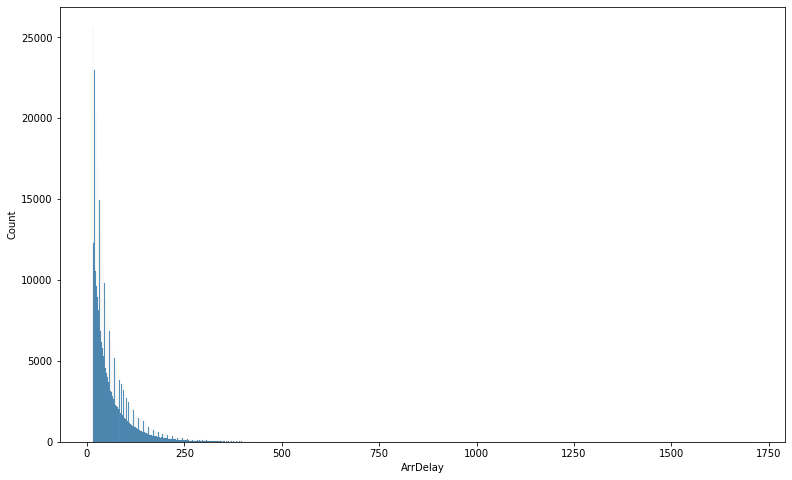

In [150]:
#Arrival delay is the Difference in minutes between scheduled and actual arrival time
sns.histplot(df['ArrDelay'], )
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11,8
plt.show()


In [151]:
#skewness and kurtosis
print("Skewness: %f" % df['ArrDelay'].skew())
print("Kurtosis: %f" % df['ArrDelay'].kurt())

Skewness: 3.787290
Kurtosis: 33.996469


---We know that in **postively skewed distribution** the data values are clustered around the left side of the distribution and the right side is longer.

---The data is very closely distributed. The height of the peak is greater than width of the peak. 

--- So the majority of the delays are short timed. Compared to short time delay, minority of the delays are long timed.



In [152]:
#min value of Arrival delay(in minutes)
min_value = df.ArrDelay.min()
min_value

15

In [153]:
#max value of Arrival delay(in minutes)
max_value = df.ArrDelay.max()
max_value

1707

--- The minimum Arrival delay is **15 Minutes**

--- The maximum Arrival delay is **1707 Minutes**

(where Arrival delay is the difference in scheduled arrival time and actual  arrival time)

### 4.8 **Airline vs Types of delays**

CarrierDelay →     Flight delay due to carrier(e.g. maintenance or crew problems, aircraft cleaning, fueling, etc), 0 = No, yes = (in minutes)

WeatherDelay →     Flight delay due to weather, 0 = No, yes = (in minutes)

NASDelay →         Flight delay by NSA(National Aviation System), 0 = No, yes = (in minutes)

SecurityDelay → Flight delay by this reason, 0 = No, yes = (in minutes)

LateAircraftDelay → Flight delay by this reason, 0 = No, yes = (in minutes)

####     4.8.1 Airline vs CarrierDelay(in minutes)


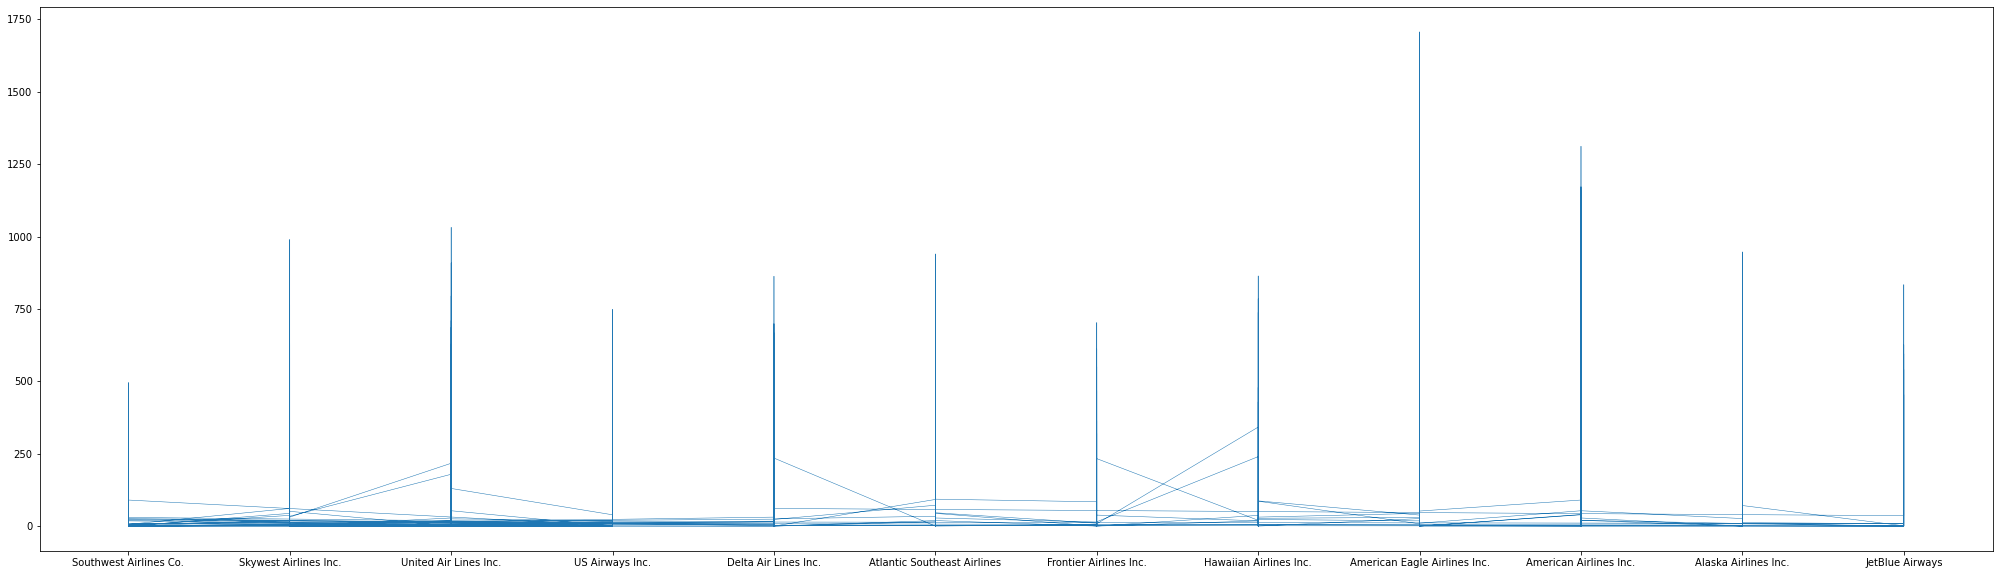

In [155]:
import matplotlib.pyplot as plt

cols = df.columns
figure, ax1 = plt.subplots(figsize=(35,10))
ax1.plot(df[cols[6]],df[cols[17]],linewidth= 0.5,zorder=1 )


 **American Eagle Airlines Inc.** flights take more time (in minutes) for the carrier delay.

In other words, American Eagle Airlines has taken the highest time in minutes for the carrier delay.

#### 4.8.2 Airline vs Weather Delay

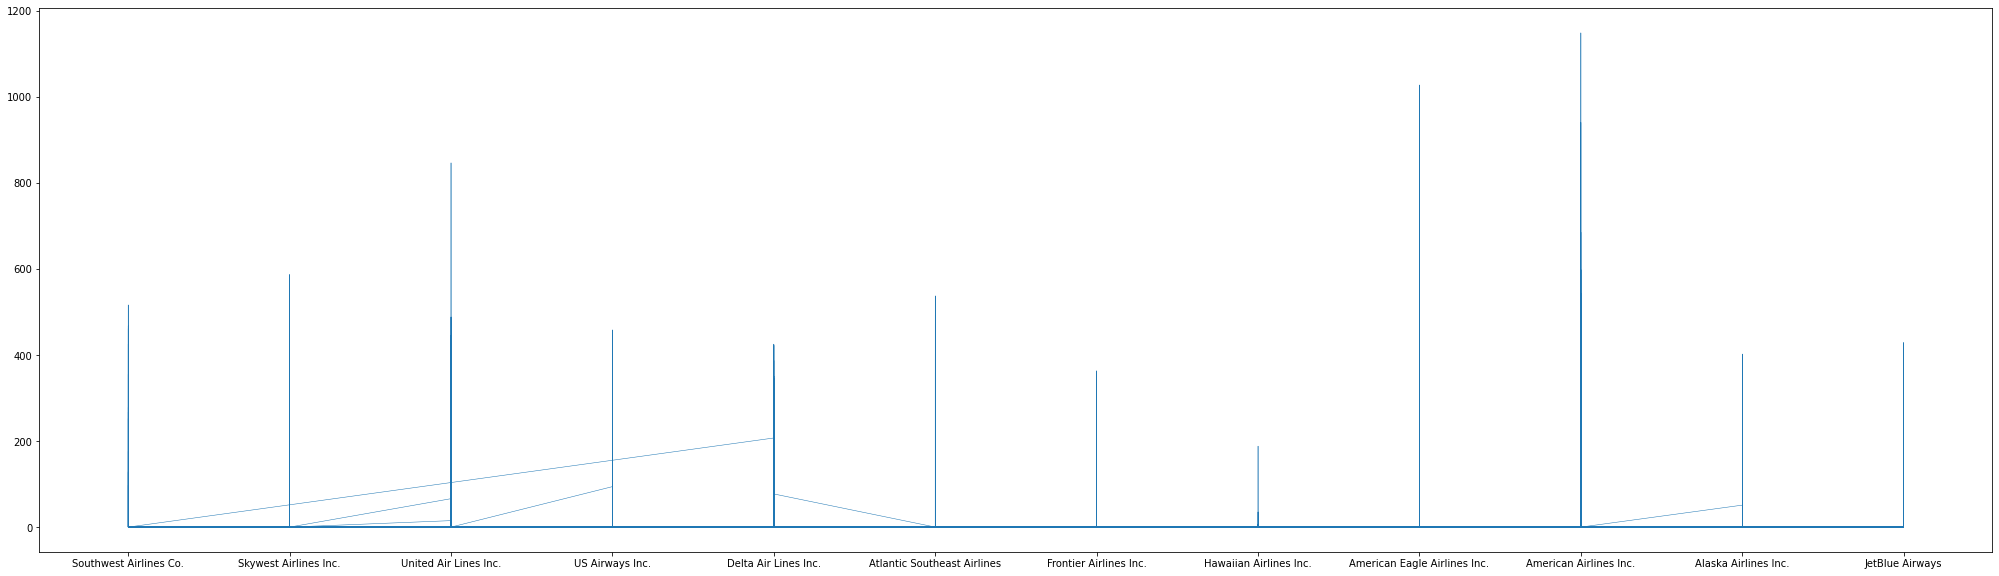

In [156]:
cols = df.columns
figure, ax1 = plt.subplots(figsize=(35,10))
ax1.plot(df[cols[6]],df[cols[18]],linewidth= 0.5,zorder=1 )

**American Airlines Inc.** flights take more time (in minutes) for the weather delay.

In other words, American Airlines Inc. has taken the highest time in minutes for the weather delay.

#### 4.8.3 Airline vs NAS delay

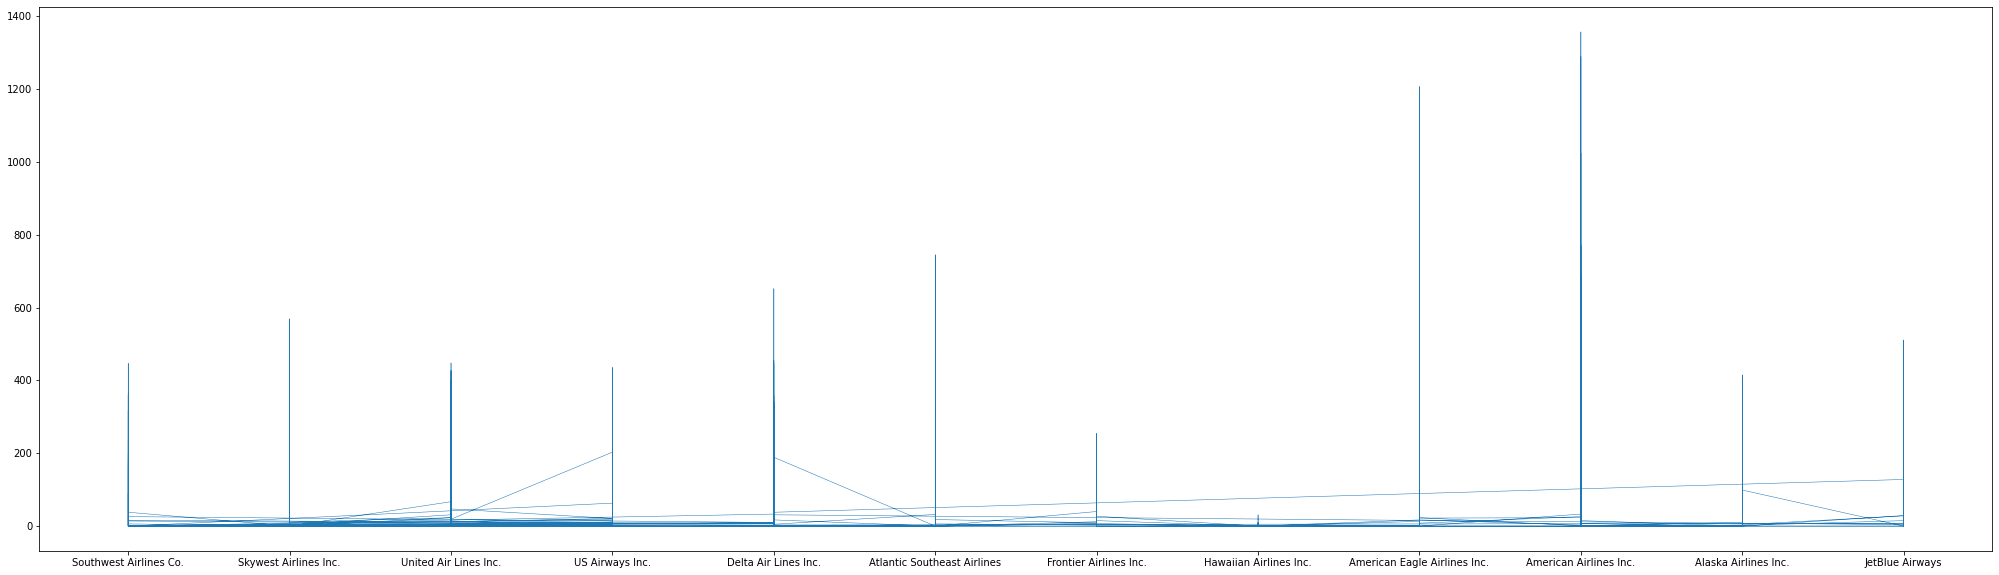

In [157]:
cols = df.columns
figure, ax1 = plt.subplots(figsize=(35,10))
ax1.plot(df[cols[6]],df[cols[19]],linewidth= 0.5,zorder=1 )

**American Airlines Inc.** flights take more time (in minutes) for the NAS delay.

In other words, American Airlines Inc. has taken the highest time in minutes for the NAS delay.

#### 4.8.4  Airline vs Security Delay

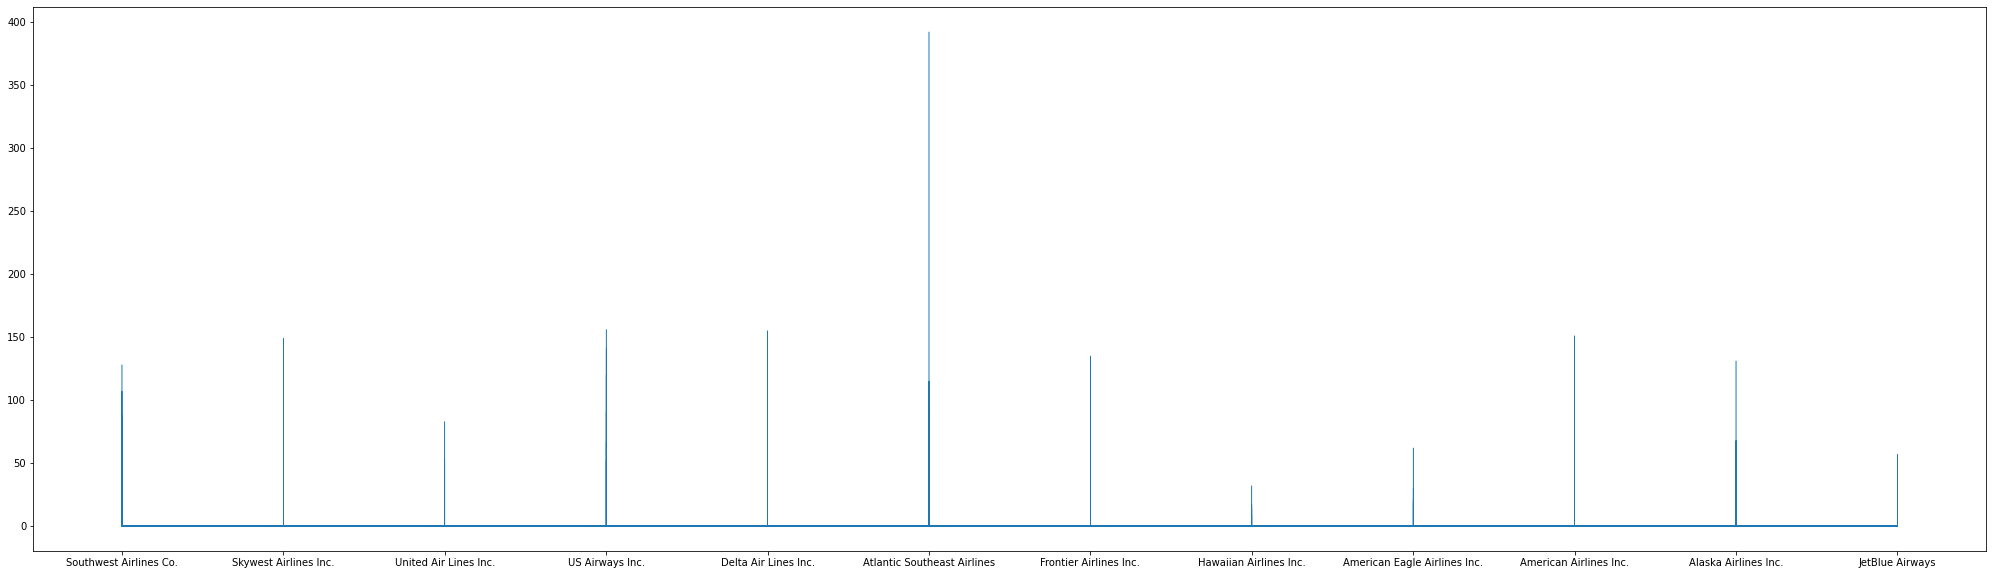

In [158]:
cols = df.columns
figure, ax1 = plt.subplots(figsize=(35,10))
ax1.plot(df[cols[6]],df[cols[20]],linewidth= 0.5,zorder=1 )

**Atlantic Southeast Airlines** flights take more time (in minutes) for the Security delay.

In other words, Atlantic Southeast Airlines. has taken the highest time in minutes for the Security delay.

####  4.8.5 Airline vs Late Aircraft Delay

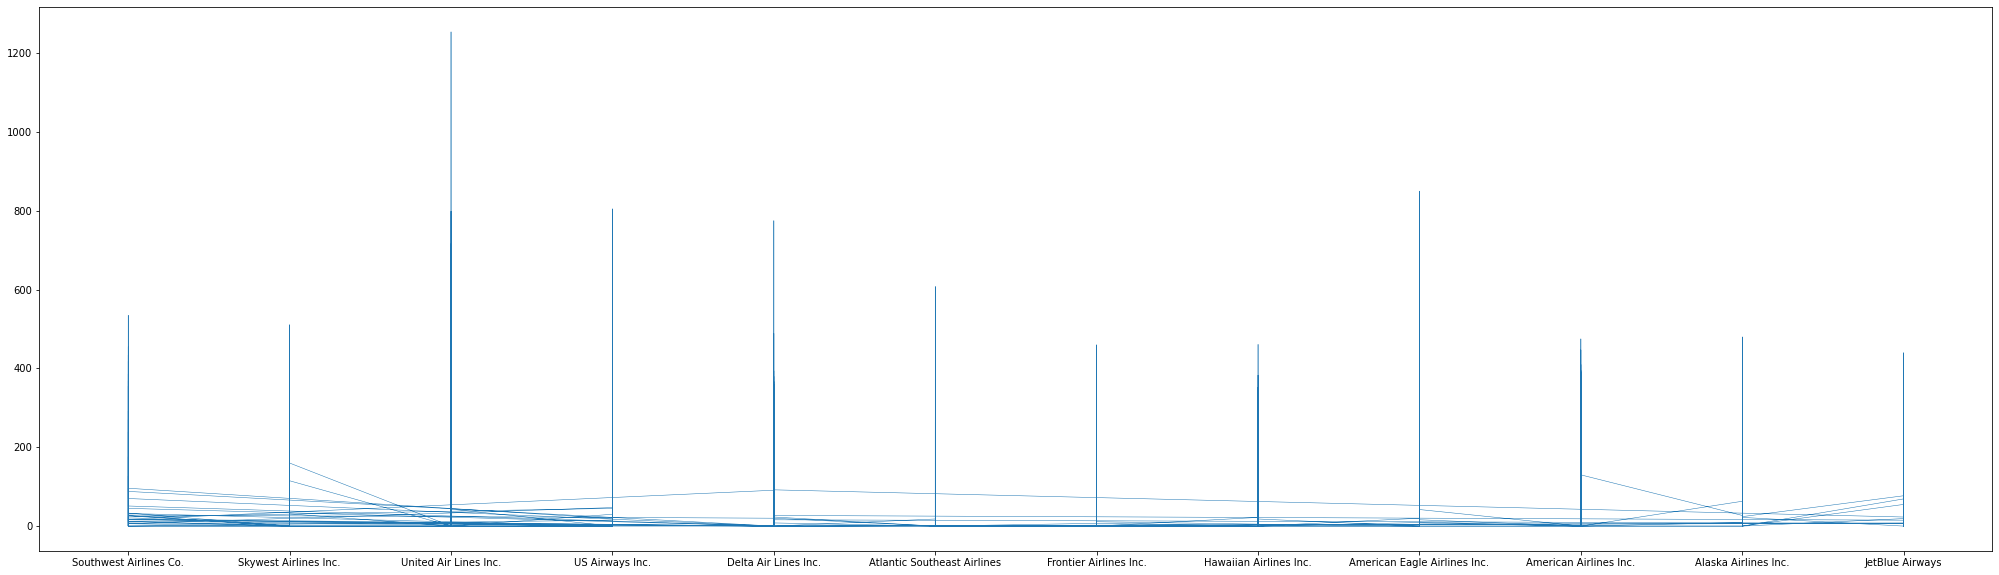

In [159]:
cols = df.columns
figure, ax1 = plt.subplots(figsize=(35,10))
ax1.plot(df[cols[6]],df[cols[21]],linewidth= 0.5,zorder=1 )

**United Airline Inc.** flights take more time (in minutes) for the Late Aircraft delay.

In other words, United Airline Inc. has taken the highest time in minutes for the Late Aircraft delay.

### 4.9 **Causes For Delay**

In [160]:
df['Month']= df['DepTimeStamp'].dt.month
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,ArrDelay,Origin,Org_Airport,Dest,Dest_Airport,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTimeStamp,Month
0,4,03-01-2019,18:29,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,34,IND,Indianapolis International Airport,BWI,Baltimore-Washington International Airport,3,10,2,0,0,0,32,2019-03-01 18:29:00,3
1,4,03-01-2019,19:37,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,57,IND,Indianapolis International Airport,LAS,McCarran International Airport,3,7,10,0,0,0,47,2019-03-01 19:37:00,3
2,4,03-01-2019,16:44,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,80,IND,Indianapolis International Airport,MCO,Orlando International Airport,6,8,8,0,0,0,72,2019-03-01 16:44:00,3
3,4,03-01-2019,14:52,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,15,IND,Indianapolis International Airport,PHX,Phoenix Sky Harbor International Airport,7,8,3,0,0,0,12,2019-03-01 14:52:00,3
4,4,03-01-2019,13:23,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,16,IND,Indianapolis International Airport,TPA,Tampa International Airport,4,9,0,0,0,0,16,2019-03-01 13:23:00,3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


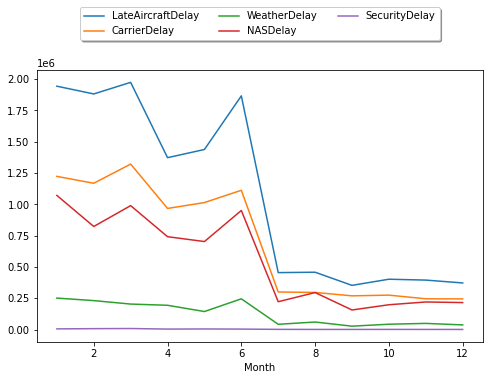

In [162]:
df2 = df.filter(['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
df2 = df2.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 7,4
plt.show()

#### This clearly shows that **LateAircraft delay, Carrier Delay, and NAS delay** shows most delay during the year.

### 4.10 **Late Aircraft Delay**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


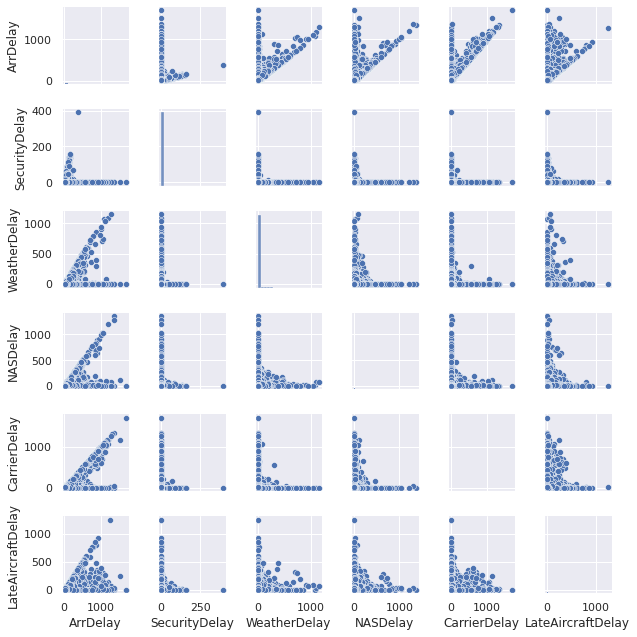

In [163]:
#pair plot for 5 types of delays and arrival time
sns.set()
cols = ['ArrDelay','SecurityDelay','WeatherDelay','NASDelay','CarrierDelay','LateAircraftDelay']
sns.pairplot(df[cols], size = 1.5)
plt.show()

From this pairplot, we can see that Late Aircraft Delay is the most important feature

There is no significant correlation between the types of delays themselves. But more information can be extracted from the correlation between Arrival delay and types of delay.

We can find out exact root cause for each delay with the help of the routes of each aircrafts and other some details.
But that is not within the scope of this analysis.

### 4.11  **Carrier Delay**

#### Value counts of each Unique Carrier 

In [164]:
print(df['UniqueCarrier'].value_counts())

WN    119048
AA     73053
MQ     58698
UA     56896
OO     50384
US     31755
DL     30220
EV     28678
B6     15364
AS     10000
F9      9015
HA      1440
Name: UniqueCarrier, dtype: int64


#### Average Delay by carrier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


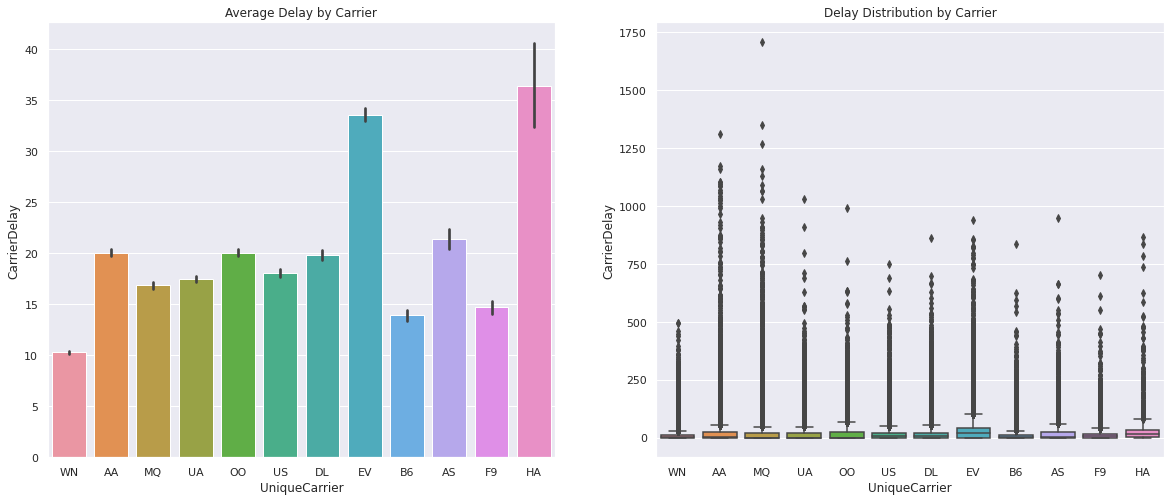

['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines', 'OO: Skywest Airlines', 'US: US Airways', 'DL: Delta Airlines', 'EV: Atlantic Southeast Airlines', 'B6: JetBlue Airways', 'AS: Alaska Airlines', 'F9: Frontier Airlines', 'HA: Hawaiian Airlines']


In [165]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('UniqueCarrier','CarrierDelay', data=df,ax=ax[0], order=['WN', 'AA', 'MQ', 'UA','OO','US','DL',
                                                                     'EV', 'B6', 'AS','F9','HA'])
                                                                                
                                                                                
ax[0].set_title('Average Delay by Carrier')


sns.boxplot('UniqueCarrier','CarrierDelay', data=df,ax=ax[1], order=['WN', 'AA', 'MQ', 'UA','OO','US','DL',
                                                                     'EV', 'B6', 'AS','F9','HA'])
ax[1].set_title('Delay Distribution by Carrier')
plt.close(2)
plt.show()

print(['WN: Southwest Airlines', 'AA: American Airlines', 'MQ: American Eagle Airlines', 'UA: United Airlines',
       'OO: Skywest Airlines','US: US Airways','DL: Delta Airlines','EV: Atlantic Southeast Airlines',
       'B6: JetBlue Airways','AS: Alaska Airlines','F9: Frontier Airlines','HA: Hawaiian Airlines',])


In [166]:
Unique = df[["UniqueCarrier", "CarrierDelay"]]
Unique.shape

(484551, 2)

In [170]:
#mean value of HA- Hawaiian Airlines Carrier
HA = Unique[Unique["UniqueCarrier"] == 'HA']
HA.mean()

CarrierDelay    36.410417
dtype: float64

In [171]:
#mean value of EV -Atlantic Southeast Airlines Carrier
EV = Unique[Unique["UniqueCarrier"] == 'EV']
EV.mean()

CarrierDelay    33.603947
dtype: float64

Carriers with higher average delay generation are Hawaiian Airlines (HA) with 36.41 minutes per flight,  Atlantic Southeast Airlines (EV) with 33.60 minutes per flight.

### 4.12 **NAS Delay**

After Little bit of research, I found that NAS Delays include some extreme weather conditions, heavy traffic volume , air traffic control, etc. Delays that occur after Actual Gate Out are usually attributed to the NAS.

So theses conditions may occur on both the Origin Airport and the Destination Airport.


In [172]:
df4=df[['Origin','NASDelay']].groupby('Origin').agg(['mean','count']).sort_values(by=('NASDelay','mean'), ascending=False)[:10]
df4

NASDelay      
             mean count
Origin                 
LAN     83.687500    96
SPI     83.309091    55
ACY     81.200000    10
PMD     73.183333    60
MBS     65.230769    52
RDD     61.980000   200
FAR     57.424908   273
LNK     55.724014   279
TVC     51.995652   230
ACV     50.340796   402

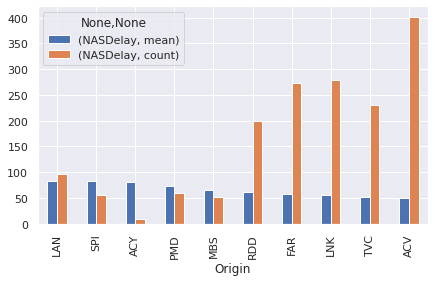

In [173]:
df4.plot(kind='bar')

We sorted the origins in terms of departure delay ratio . The locations with high delay rates have very few flights.
The locations with low delay rates have very high number of flight counts.

## **5. Conclusion**

### Ask and Answer Questions



Which airlines take more time for each of these 5 delay?

In which day of the week delay happens the most?

which flight delay most frequently?

In which Time of the day mostly delay happens?

what day of the week the delay happens the most?

which month have the most delay?

Major causes of the delay?


### Insights

*   All the flights in the data of this dataset, have atleast any one of the delay.

*   **Southwest Airline company** has the largest number of travel delay records

*   The maximum number of delay happened on **FRIDAY**

*   -- A **High** Percentage of Delay occurs between 15:00:00 to 20:00:00 (i.e) **3 PM to 8 PM** .

*   The flights scheduled to depart at **3 PM to 8 PM** delays mostly

*    The flights scheduled to depart at **12 AM to 5 AM** - **less** number of **delay**

*   Data is available for **First half of the year 2019**.
From that first 6 months, March month has more delay records

*    The **majority of the delays are short timed**. Compared to short time delay, minority of the delays are long timed.

*  The **minimum Arrival delay** is **15 Minutes** &  The **maximum Arrival delay** is **1707 Minutes**


*   Chicago O'Hare International Airport is the airport where most frequently flights depart and arrive 

*   **American Eagle Airlines** has taken the highest time in minutes for the **carrier delay**.

*   **American Airlines Inc.** has taken the highest time in minutes for the **weather delay**.

*   **American Airlines Inc.** has taken the highest time in minutes for the **NAS delay**.


*   **Atlantic Southeast Airlines** has taken the highest time in minutes for the **Security delay**.


*    **United Airline Inc.** has taken the highest time in minutes for the **Late Aircraft delay**.

*   **LateAircraft delay, Carrier Delay, and NAS delay** shows most delay during the year.

*    Carriers with higher average delay generation are **Hawaiian Airlines** (HA) with **36.41 minutes** per flight, **Atlantic Southeast Airlines** (EV) with **33.60 minutes** per flight

*    The locations with high delay rates have very few flights. The locations with low delay rates have very high number of flight counts.


